<h1>Even Baseline</h1>


Here we evaluate the even baseline in the touch only poking setting on the test set. Because we call with the visualize parameters as True we can view the predicted objects with actions chosen randomly. 

In [6]:
import os
from pterotactyl.reconstruction import touch 
from pterotactyl.reconstruction import vision 
from pterotactyl.policies.baselines import even
from pterotactyl import pretrained

TOUCH_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/touch/best/'
VISION_LOCATION = os.path.dirname(pretrained.__file__) + '/reconstruction/vision/t_p/'




class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "even_example"
        self.finger = True 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = False
        self.touch_location = TOUCH_LOCATION
        self.vision_location = VISION_LOCATION
        self.visualize = True
        self.use_latent = False
        self.use_recon = True 
        self.eval = True 
        self.pretrained_recon = True 
        
    

params = Params()
even_test = even.Engine(params)
even_test()

100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 4425.27it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


 17%|█████████████▊                                                                     | 1/6 [00:01<00:08,  1.76s/it]

Valid || score: 0.1572 reward = 0.8428 ave: 15.7215 %


 33%|███████████████████████████▋                                                       | 2/6 [00:03<00:06,  1.55s/it]

Valid || score: 0.1823 reward = 0.8177 ave: 16.9754 %


 50%|█████████████████████████████████████████▌                                         | 3/6 [00:04<00:04,  1.50s/it]

Valid || score: 0.2959 reward = 0.7041 ave: 21.1789 %


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [00:06<00:02,  1.48s/it]

Valid || score: 0.3516 reward = 0.6484 ave: 24.6744 %


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:07<00:01,  1.46s/it]

Valid || score: 0.2362 reward = 0.7638 ave: 24.4632 %


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:08<00:01,  1.46s/it]

Valid || score: 0.1783 reward = 0.8217 ave: 23.3584 %
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]


******************************
*********************************************
Total Valid || score: 0.2336, reward = 0.7664
*********************************************


We can now visualize the predicted objects with even actions, and also the distribution of chosen actions both in a histogram and projected from the shpere of posssible actions into image space. 

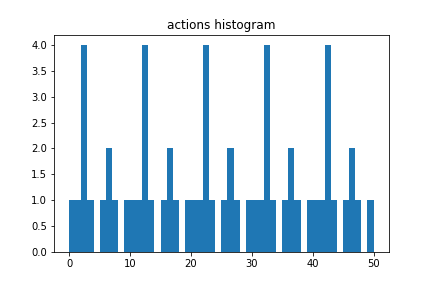




   Projected Actions


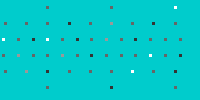

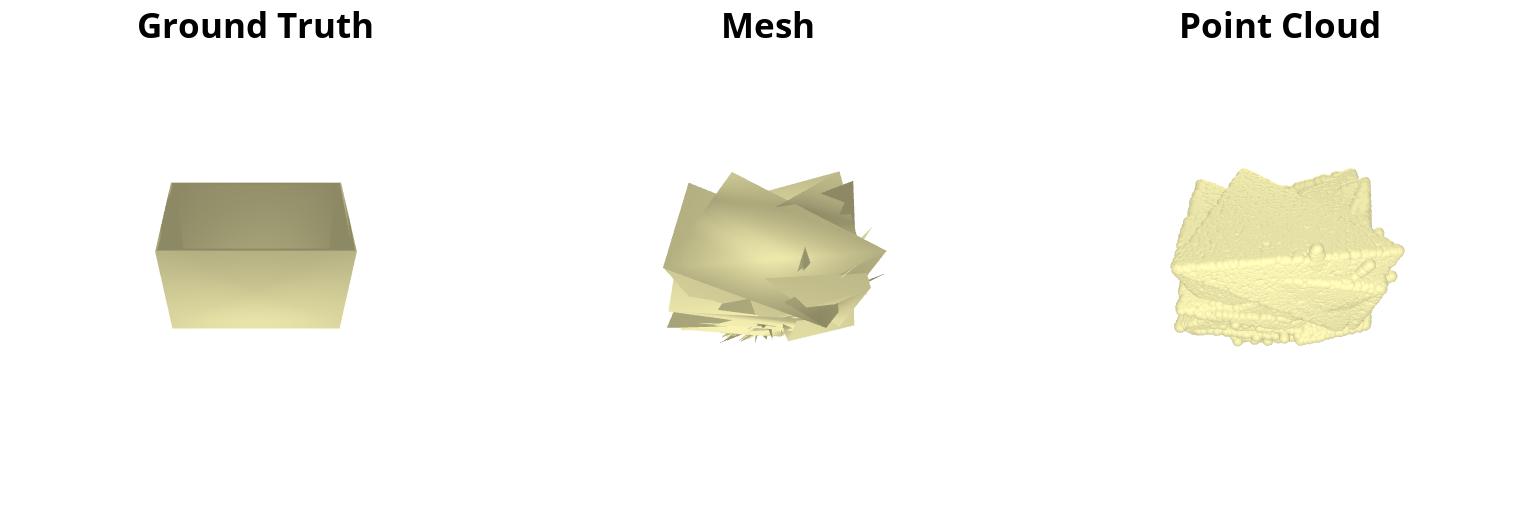

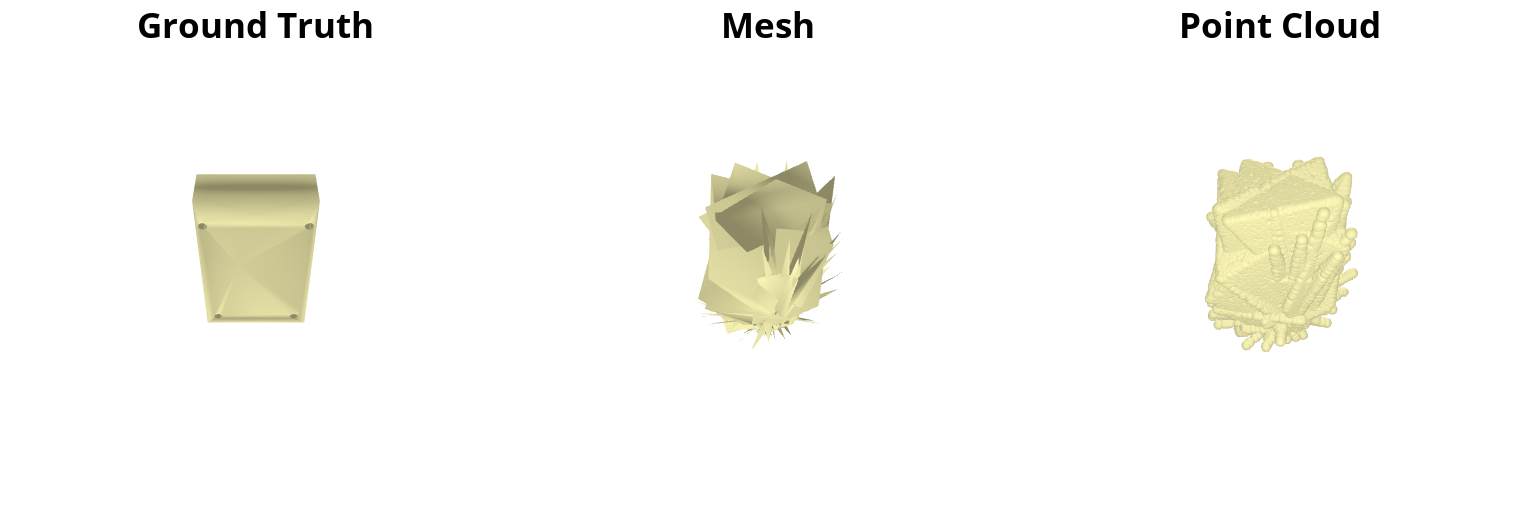

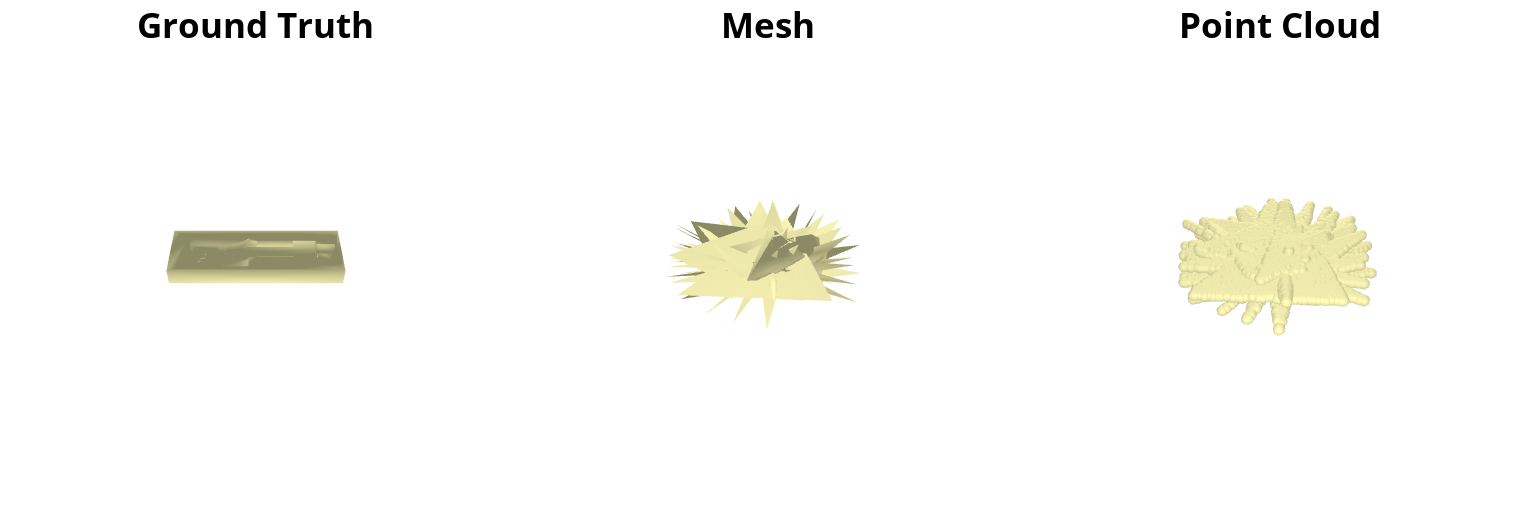

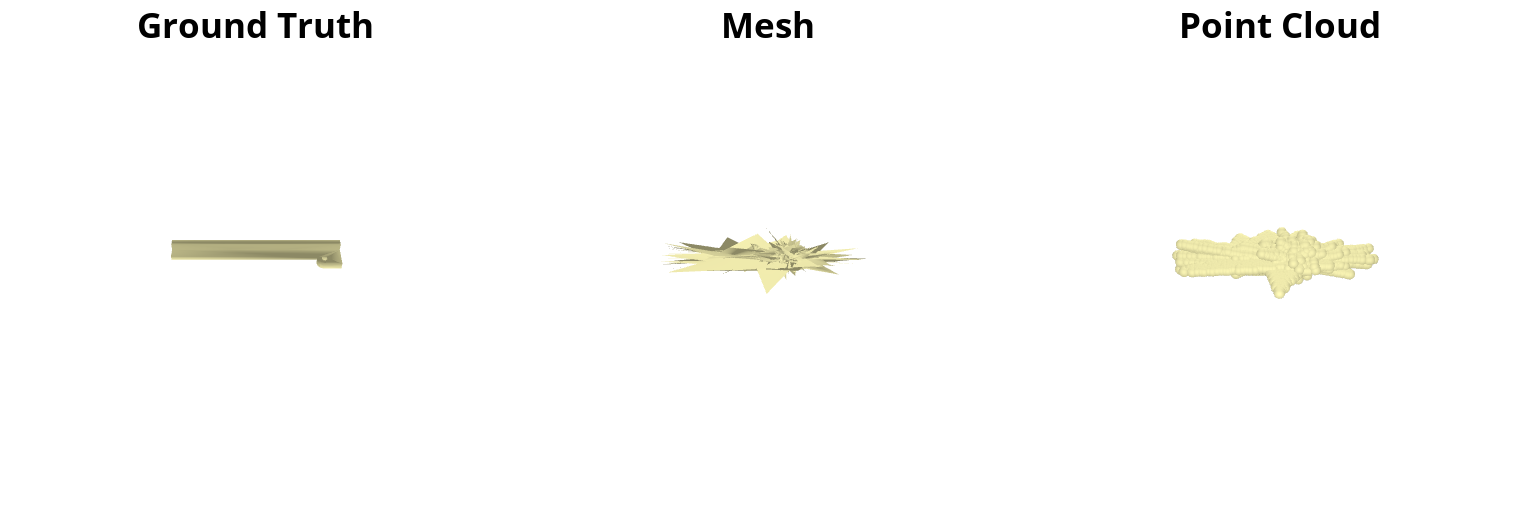

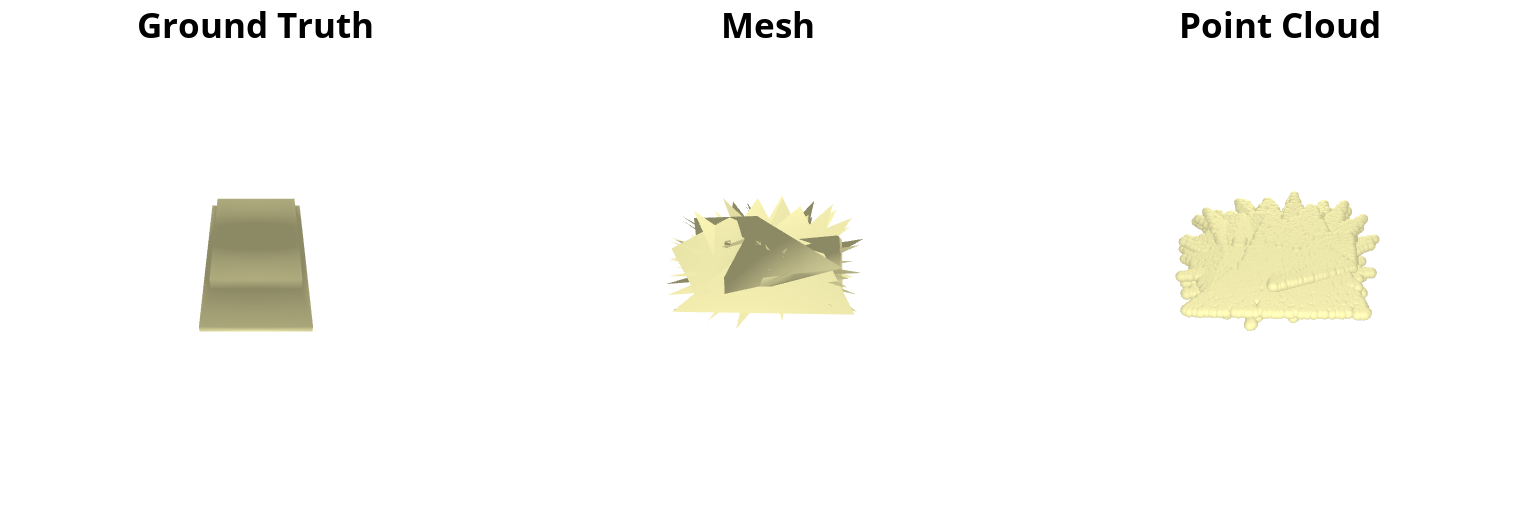

In [7]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


histogram = Image.open('results/even_example/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/even_example/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/even_example/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)